In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [14]:
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
digits.data.shape

(1797, 64)

In [37]:
def plot_digits(data):
    #dats的结构必须是（m，n），并且n要能够被分成（8,8）这样的结构
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                             ,subplot_kw = {"xticks":[],"yticks":[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")

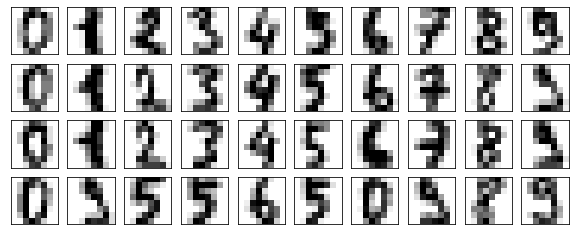

In [38]:
plot_digits(digits.data)

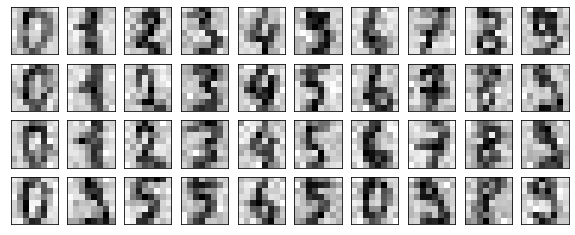

In [40]:
#人为加上数据噪音
rng = np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)#从输入的数据集中随机抽取一个，满足正太分布的另一个数据集，2是方差的大小
plot_digits(noisy)#画图，显示加噪音之后的数字

In [43]:
#进行降噪
#降噪的第一步是降维
pca = PCA(0.5,svd_solver="full").fit(noisy)#取出降维后带有原始特征50%的数
X_dr = pca.transform(noisy)
X_dr.shape
#降维之后应该包含的数图像的主要特征，不包含噪音

(1797, 6)

In [44]:
#验证效果
#使用inverse_transform逆转回去
without_noise = pca.inverse_transform(X_dr)

In [46]:
without_noise.shape#由于data的结构必须是8*8的，所有不能直接打印出降噪之后的X_dr，必须先还原回去

(1797, 64)

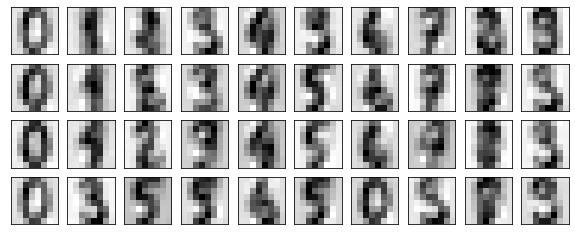

In [47]:
plot_digits(without_noise)